In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('mtcars_missing.csv')
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.0,NaN,2.875,*,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,-,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [4]:
data.isnull().sum()

car_model    0
mpg          1
cyl          0
disp         2
hp           2
drat         1
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

## Find all missing values chars / symbols/phrases and replace them with np.nan

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_model    32 non-null object
mpg          31 non-null float64
cyl          32 non-null int64
disp         30 non-null object
hp           30 non-null float64
drat         31 non-null float64
wt           32 non-null object
qsec         32 non-null object
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ KB


In [17]:
data[data.wt.str.contains(r'[^0-9+.]')]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1


In [19]:
data.disp.sort_values(ascending=True) # find the column by .info() with object data type

1         $
2       108
20    120.1
26    120.3
31      121
29      145
0       160
9     167.6
10    167.6
5       225
8       225
7       225
11    275.8
12    275.8
13    275.8
30      301
22      304
21      318
23      350
28      351
6       360
24      400
16      440
15      460
14      472
19     71.1
18     75.7
17     78.7
25       79
27     95.1
3       NaN
4       NaN
Name: disp, dtype: object

In [10]:
# use sort_values(ascending=True/False) you can easily find missing value characters.

In [22]:
import numpy as np
data.replace(['?','-','*','$'],np.nan, inplace=True)

In [23]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,NaN,110.0,NaN,2.875,NaN,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,NaN,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,NaN,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [24]:
data.describe()

,mpg,cyl,hp,drat,vs,am,gear,carb
count,31.000000,32.000000,30.000000,31.000000,32.000000,32.000000,32.000000,32.000000
mean,51.316129,6.187500,148.733333,3.541935,0.468750,0.437500,3.656250,2.718750
std,175.986930,1.712148,68.753901,0.572389,0.507007,0.504016,0.745281,1.689328
min,10.400000,4.000000,52.000000,2.760000,0.000000,0.000000,3.000000,1.000000
25%,15.350000,4.000000,105.000000,3.070000,0.000000,0.000000,3.000000,1.000000
50%,18.100000,6.000000,123.000000,3.620000,0.000000,0.000000,3.500000,2.000000
75%,22.150000,8.000000,180.000000,3.920000,1.000000,1.000000,4.000000,4.000000
max,999.000000,8.000000,335.000000,4.930000,1.000000,1.000000,5.000000,8.000000


In [25]:
data[data.mpg>100]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,NaN,1,0,3,1


In [27]:
data.loc[3,'mpg'] = np.nan

In [28]:
data.describe()

,mpg,cyl,hp,drat,vs,am,gear,carb
count,30.000000,32.000000,30.000000,31.000000,32.000000,32.000000,32.000000,32.000000
mean,19.726667,6.187500,148.733333,3.541935,0.468750,0.437500,3.656250,2.718750
std,6.160046,1.712148,68.753901,0.572389,0.507007,0.504016,0.745281,1.689328
min,10.400000,4.000000,52.000000,2.760000,0.000000,0.000000,3.000000,1.000000
25%,15.275000,4.000000,105.000000,3.070000,0.000000,0.000000,3.000000,1.000000
50%,18.100000,6.000000,123.000000,3.620000,0.000000,0.000000,3.500000,2.000000
75%,21.475000,8.000000,180.000000,3.920000,1.000000,1.000000,4.000000,4.000000
max,33.900000,8.000000,335.000000,4.930000,1.000000,1.000000,5.000000,8.000000


In [29]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,NaN,110.0,NaN,2.875,NaN,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,NaN,18.61,1,1,4,1
3,Hornet 4 Drive,NaN,6,NaN,NaN,3.08,3.215,NaN,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [33]:
data.isnull().sum()

car_model    0
mpg          2
cyl          0
disp         3
hp           2
drat         1
wt           1
qsec         2
vs           0
am           0
gear         0
carb         0
dtype: int64

### if we have < 5% missing values records we drop them, if not we treat them

In [35]:
data.isnull().sum().sum() # 11 is not no of records missing, its no of data fields

11

In [42]:
data.dropna()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
5,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
7,Valiant 2,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
8,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123.0,3.92,3.44,18.3,1,0,4,4
10,Merc 280C,17.8,6,167.6,123.0,3.92,3.44,18.9,1,0,4,4
11,Merc 450SE,16.4,8,275.8,180.0,3.07,4.07,17.4,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180.0,3.07,3.73,17.6,0,0,3,3
13,Merc 450SLC,15.2,8,275.8,180.0,3.07,3.78,18,0,0,3,3


In [44]:
data.dropna().shape[0]

28

In [45]:
data.shape[0]

32

In [41]:
(data.shape[0] -data.dropna().shape[0])*100/data.shape[0]

12.5

In [46]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,NaN,110.0,NaN,2.875,NaN,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,NaN,18.61,1,1,4,1
3,Hornet 4 Drive,NaN,6,NaN,NaN,3.08,3.215,NaN,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [47]:
data.fillna(100) # this is wrong

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,100,110.0,100.00,2.875,100,0,1,4,4
2,Datsun 710,100.0,4,108,100.0,3.85,100,18.61,1,1,4,1
3,Hornet 4 Drive,100.0,6,100,100.0,3.08,3.215,100,1,0,3,1
4,Datsun 710,22.8,4,100,93.0,3.85,2.32,18.61,1,1,4,1
5,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
7,Valiant 2,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
8,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123.0,3.92,3.44,18.3,1,0,4,4


In [49]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,NaN,110.0,NaN,2.875,NaN,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,NaN,18.61,1,1,4,1
3,Hornet 4 Drive,NaN,6,NaN,NaN,3.08,3.215,NaN,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [50]:
data.fillna(method='bfill') # backward fill

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,108,110.0,3.85,2.875,18.61,0,1,4,4
2,Datsun 710,22.8,4,108,93.0,3.85,3.215,18.61,1,1,4,1
3,Hornet 4 Drive,22.8,6,225,93.0,3.08,3.215,18.61,1,0,3,1
4,Datsun 710,22.8,4,225,93.0,3.85,2.32,18.61,1,1,4,1
5,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
7,Valiant 2,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
8,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123.0,3.92,3.44,18.3,1,0,4,4


In [48]:
data.fillna(method='ffill') # forward fill

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160,110.0,3.90,2.875,16.46,0,1,4,4
2,Datsun 710,21.0,4,108,110.0,3.85,2.875,18.61,1,1,4,1
3,Hornet 4 Drive,21.0,6,108,110.0,3.08,3.215,18.61,1,0,3,1
4,Datsun 710,22.8,4,108,93.0,3.85,2.32,18.61,1,1,4,1
5,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
7,Valiant 2,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
8,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123.0,3.92,3.44,18.3,1,0,4,4


### a popular solution is mean replacement

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_model    32 non-null object
mpg          30 non-null float64
cyl          32 non-null int64
disp         29 non-null object
hp           30 non-null float64
drat         31 non-null float64
wt           31 non-null object
qsec         30 non-null object
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ KB


In [53]:
data.disp = data.disp.astype('float')

In [55]:
data.wt = data.wt.astype('float')
data.drat = data.drat.astype('float')

In [57]:
data.qsec = data.qsec.astype('float')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_model    32 non-null object
mpg          30 non-null float64
cyl          32 non-null int64
disp         29 non-null float64
hp           30 non-null float64
drat         31 non-null float64
wt           31 non-null float64
qsec         30 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 3.1+ KB


In [60]:
data.fillna(data.mean(),inplace=True) #Mean replace is popular method

In [61]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.000000,6,160.000000,110.000000,3.900000,2.620000,16.460000,0,1,4,4
1,Mazda RX4 Wag,21.000000,6,233.365517,110.000000,3.541935,2.875000,17.794333,0,1,4,4
2,Datsun 710,19.726667,4,108.000000,148.733333,3.850000,3.228774,18.610000,1,1,4,1
3,Hornet 4 Drive,19.726667,6,233.365517,148.733333,3.080000,3.215000,17.794333,1,0,3,1
4,Datsun 710,22.800000,4,233.365517,93.000000,3.850000,2.320000,18.610000,1,1,4,1


## Duplicates Treatment

In [62]:
data = pd.read_csv('mtcars_duplicates.csv')
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,NaN,2.875,17.02,0,1,4,4
2,Datsun 710,21.0,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,22.8,6,108.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [63]:
data.shape

(42, 12)

In [66]:
data.drop_duplicates() # only drops when all columns have same values.

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,NaN,2.875,17.02,0,1,4,4
2,Datsun 710,21.0,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,22.8,6,108.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
5,Valiant 2,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
7,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
9,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
10,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [69]:
data.drop_duplicates(['hp','wt','car_model'])

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,NaN,2.875,17.02,0,1,4,4
2,Datsun 710,21.0,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,22.8,6,108.0,110,3.08,3.215,19.44,1,0,3,1
5,Valiant 2,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
7,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
9,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
10,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
11,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1


In [76]:
data = pd.read_csv('mtcars.csv')
data.sort_values(['mpg','hp','wt'],ascending=[True,False,True])

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


In [ ]:
## -3 std < data < +3std

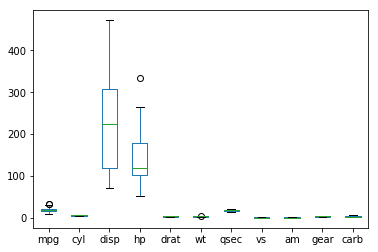

In [78]:
import matplotlib.pyplot as plt

data.plot(kind='box')
plt.show()

In [85]:
data[ (data.hp < abs(data.hp.mean()+3*data.hp.std()))]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Valiant 2,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
8,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
pd.concat((old,new)) # columns labels should match

In [86]:
data_new = pd.read_csv('mtcars_newdata.csv')
data_new.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
1,Valiant 2,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
2,Valiant,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
3,Merc 280,19.2,6,167.6,123,3.92,3.44,18.30,1,0,4,4
4,Merc 280C,17.8,6,167.6,123,3.92,3.44,18.90,1,0,4,4


In [88]:
data_new.shape

(10, 12)

In [90]:
pd.concat((data,data_new), ignore_index=True)

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Valiant 2,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
8,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
